In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('wine.csv')

In [4]:
df.shape

(178, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


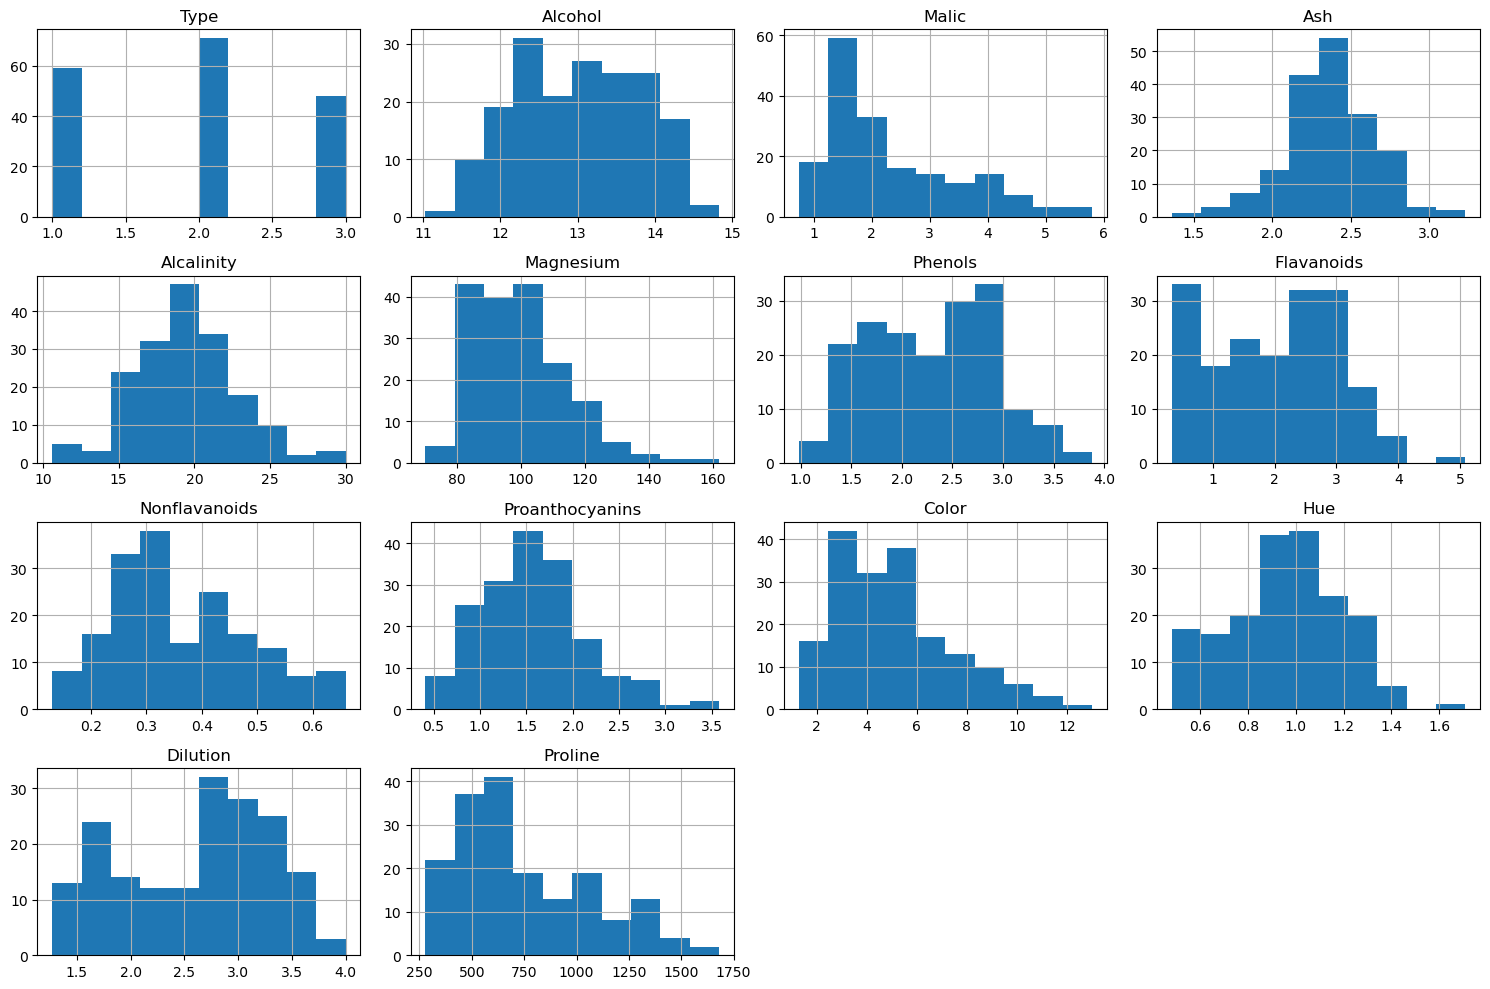

In [7]:
### distribution of features
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

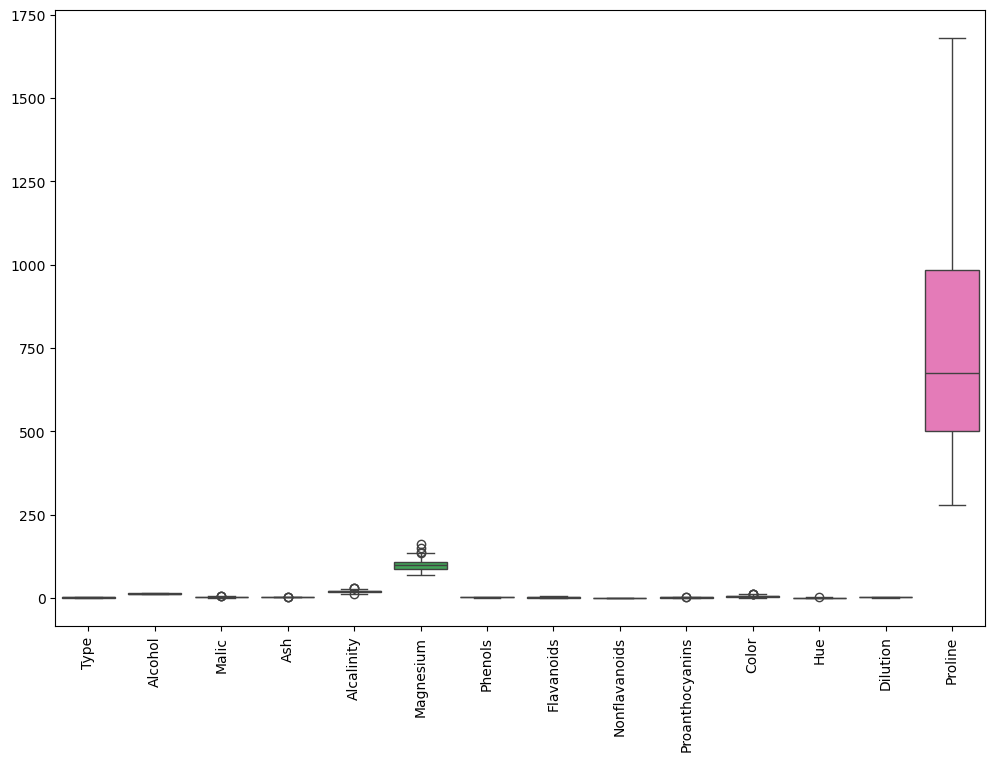

In [8]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

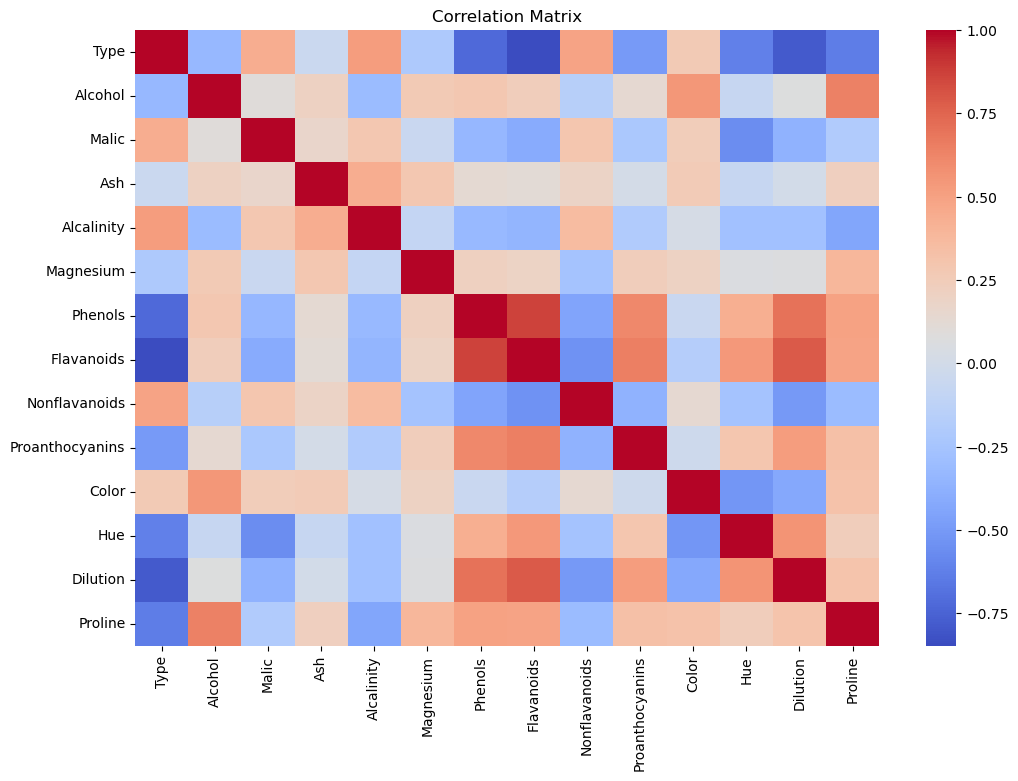

In [10]:
###Correlation Analysis
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Dimensionality Reduction with PCA

In [13]:
### feature standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [14]:
### applying pca
from sklearn.decomposition import PCA

pca = PCA()
pca_data = pca.fit_transform(scaled_data)


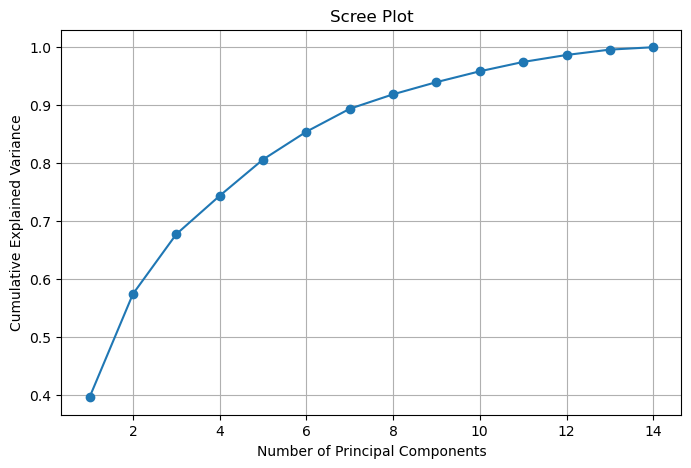

In [15]:
###Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),
        pca.explained_variance_ratio_.cumsum(),
        marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [16]:
###Around 2–3 principal components explain a significant portion of variance

In [18]:
###PCA with Optimal Components
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_transformed, columns=['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,-3.522934,1.453098
1,-2.528858,-0.330019
2,-2.785029,1.036936
3,-3.922588,2.768210
4,-1.407511,0.867773


### Clustering with Original Data

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels_original = kmeans.fit_predict(scaled_data)

C:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


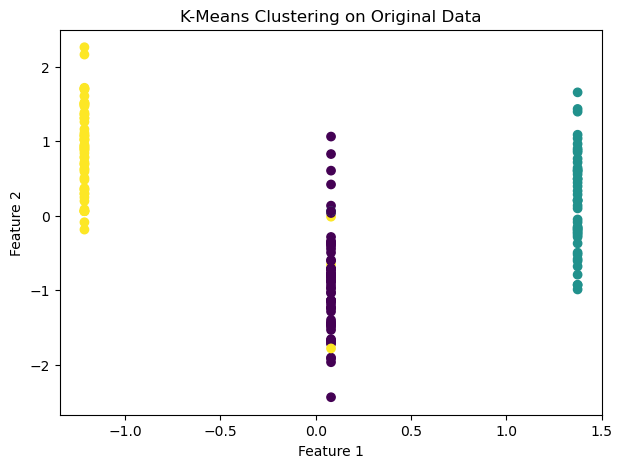

In [21]:
###Visualization
plt.figure(figsize=(7,5))
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=labels_original, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering on Original Data')
plt.show()

In [22]:
###Clustering Evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_original = silhouette_score(scaled_data, labels_original)
db_original = davies_bouldin_score(scaled_data, labels_original)

silhouette_original, db_original


(0.30648398324833453, 1.315707552261773)

In [25]:
### Clustering with PCA-Transformed Data
###Apply K-Means on PCA Data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(pca_df)


C:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


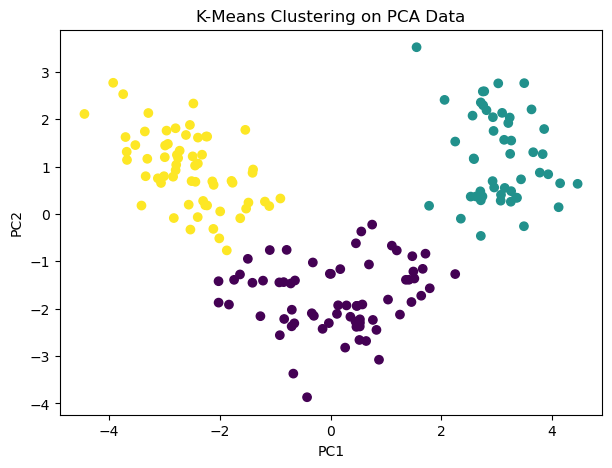

In [26]:
plt.figure(figsize=(7,5))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=labels_pca, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering on PCA Data')
plt.show()


In [27]:
###evaluation Metrics
silhouette_pca = silhouette_score(pca_df, labels_pca)
db_pca = davies_bouldin_score(pca_df, labels_pca)

silhouette_pca, db_pca


(0.6024415520362845, 0.5397078562575711)

### Comparison and Analysis